Practice Project - 7

# Big Data Mart Sales Problem

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

#### Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#### Getting the Data

In [3]:
train = pd.read_csv('bigdatamart_Train.csv')
test = pd.read_csv('bigdatamart_Test.csv')

In [4]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


#### BigMart Sales Prediction practice problem

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

-Item_Identifier: Unique product ID

-Item_Weight: Weight of product

-Item_Fat_Content: Whether the product is low fat or not

-Item_Visibility: The % of total display area of all products in a store allocated to the particular product

-Item_Type: The category to which the product belongs

-Item_MRP: Maximum Retail Price (list price) of the product

-Outlet_Identifier: Unique store ID

-Outlet_Establishment_Year: The year in which store was established

-Outlet_Size: The size of the store in terms of ground area covered

-Outlet_Location_Type: The type of city in which the store is located

-Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

-Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

## Data Inspection

In [5]:
train.shape, test.shape

((8523, 12), (5681, 11))

As said above we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [6]:
test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

In [8]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

We have same missing values percentage of Item Size and Outlet Size columns as that of in Test set.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [12]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


#### Statistic Summary

In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Data Cleaning

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

#### 1) Item Size

In [15]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

<AxesSubplot:xlabel='Item_Weight'>

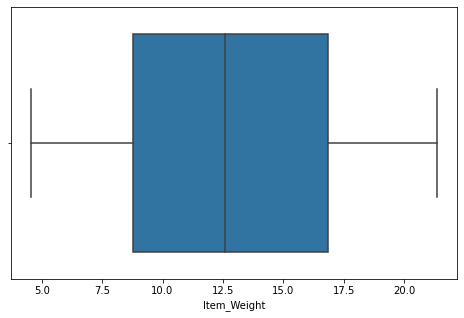

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

<AxesSubplot:xlabel='Item_Visibility'>

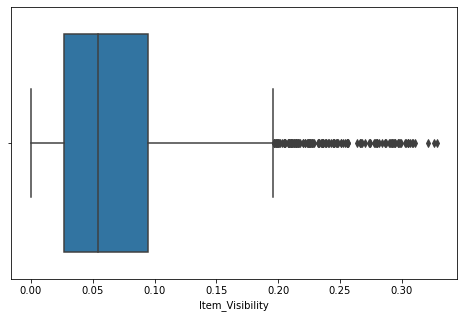

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Visibility',data=train)

<AxesSubplot:xlabel='Item_MRP'>

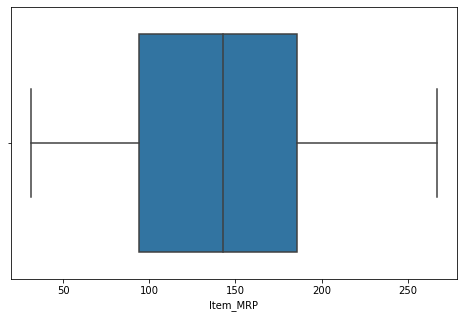

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_MRP',data=train)

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

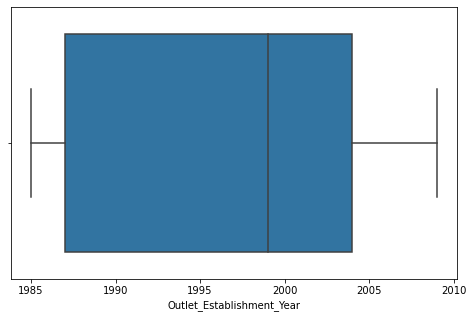

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot('Outlet_Establishment_Year',data=train)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

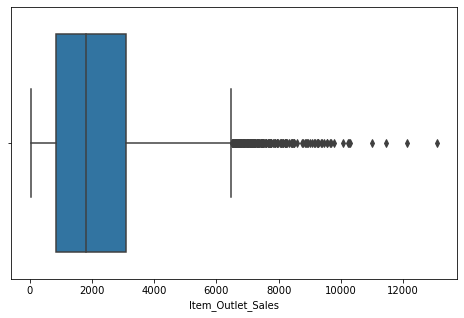

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Outlet_Sales',data=train)

<AxesSubplot:xlabel='Item_Weight'>

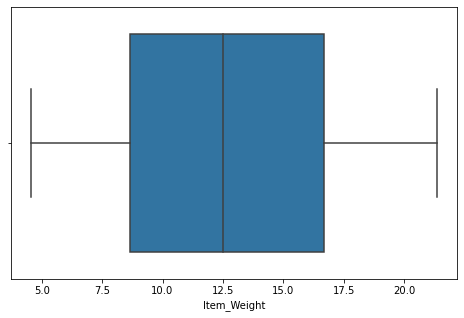

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

<AxesSubplot:xlabel='Item_Visibility'>

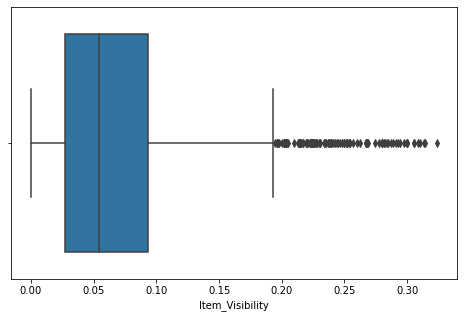

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Visibility',data=test)

<AxesSubplot:xlabel='Item_MRP'>

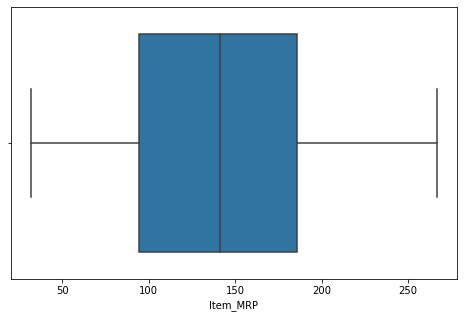

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_MRP',data=test)

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

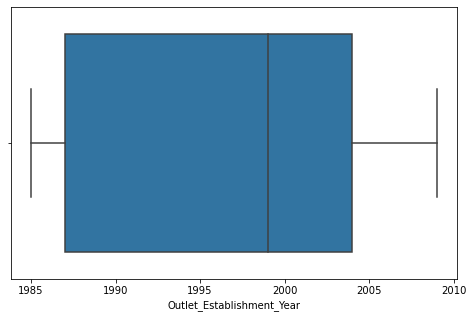

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot('Outlet_Establishment_Year',data=test)

The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [27]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [28]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

##### We have succesfully imputed the missing values from the column Item_Weight.

#### 2) Outlet Size

In [29]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [30]:
print(train['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [31]:
print(test['Outlet_Size'].value_counts())

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [33]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [34]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Outlet_Size.

## Exploratory Data Analysis

In [35]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [36]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [37]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them.

In [38]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [39]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

In [40]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [41]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,33
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,18
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,16
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,11


### Univariate Analysis

#### 1) Item Fat Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

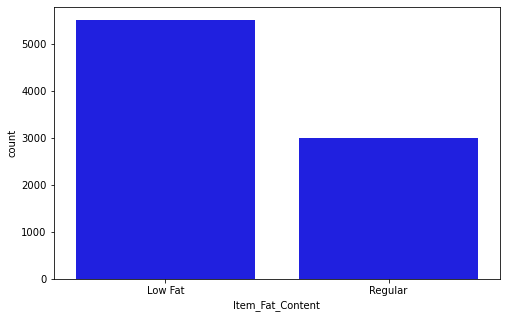

In [52]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,color='blue')

### Observations:

- The Items bought are more of Low Fat.

#### 2) Item Type

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

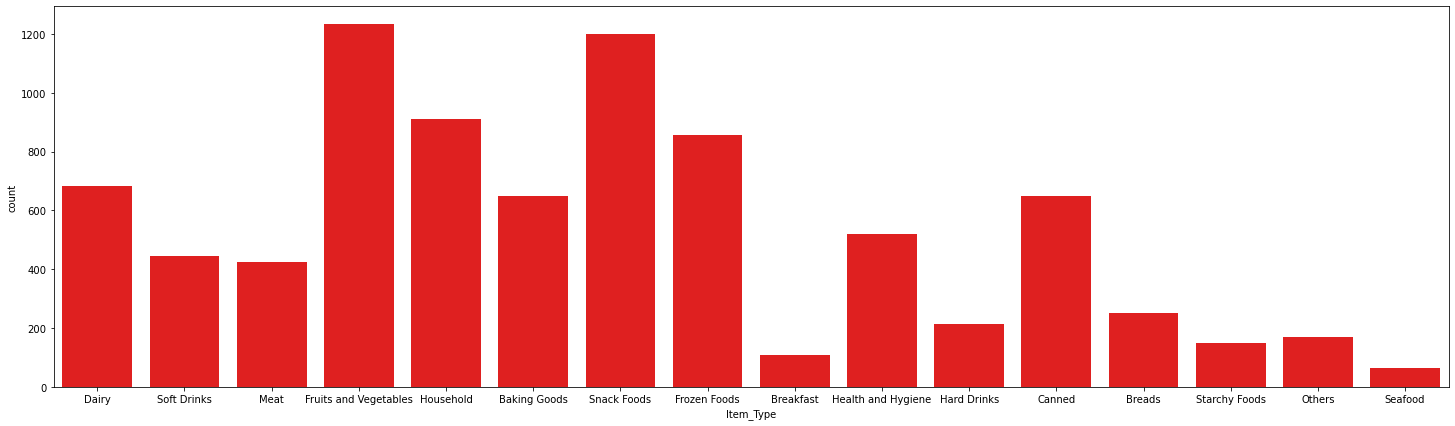

In [54]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,color='red')

### Observations:

- Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
- Snack Foods too have good sales.

#### 3) Outlet Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

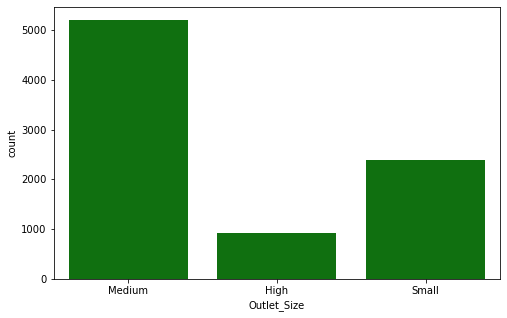

In [56]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,color='green')

### Observations:

The Outlets are more of Medium Size

#### 4) Outlet Location Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

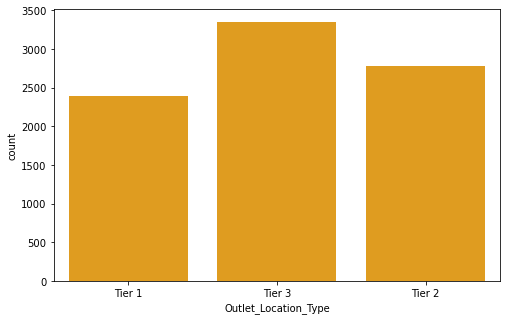

In [57]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,color='orange')

### Observations:

The Outlets are maximum in number in Tier 3 Cities.

#### 5) Outlet Type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

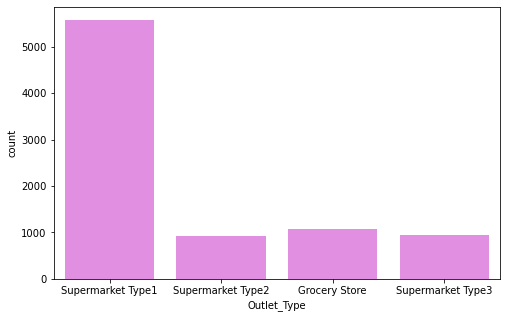

In [59]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,color='violet')

### Observations:

The Outlets are more of Supermarket Type1.

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

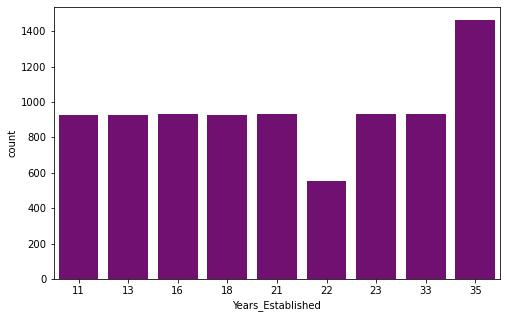

In [60]:
plt.figure(figsize=(8,5))
sns.countplot('Years_Established',data=train,color='purple')

### Observations:

The Outlets are more of established and running from 35 years.

### Bivariate Analysis

In [61]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

#### 1) Item Fat Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

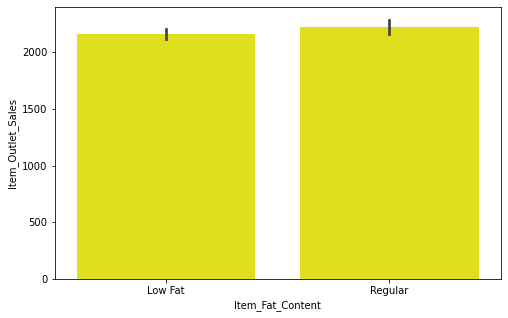

In [62]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,color='yellow')

### Observations:

The Item Outles sales are high for both Low Fat and Regular Item types.

#### 2) Item Visibility

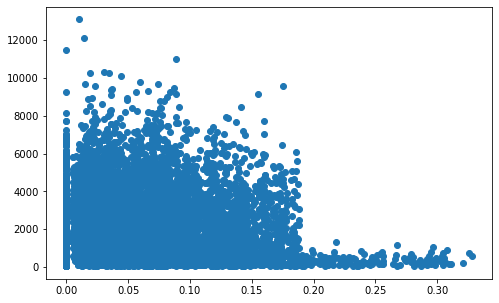

In [64]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train)

##### Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

#### Lets consider it like missing information and impute it with mean visibility of that product.

In [65]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

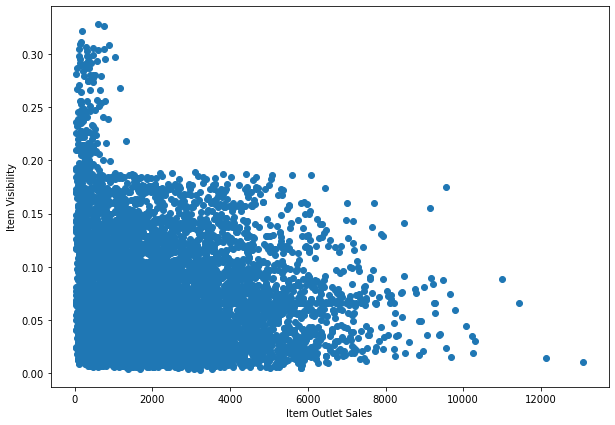

In [66]:
plt.figure(figsize=(10,7))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

#### 3) Item Type

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

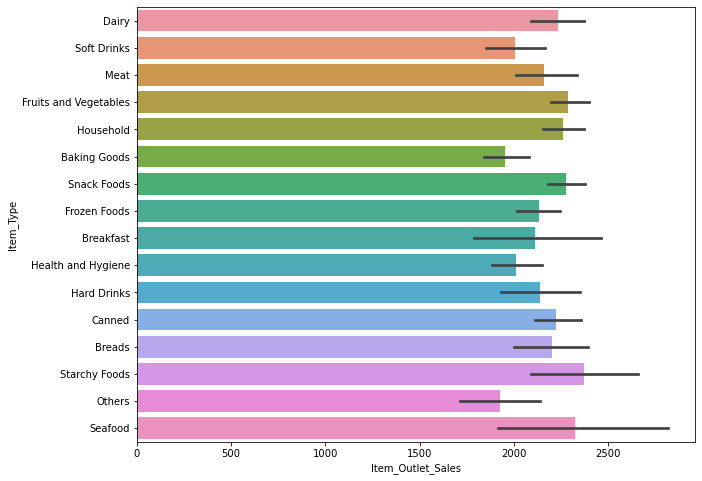

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train)

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

Text(0, 0.5, 'Item Outlet Sales')

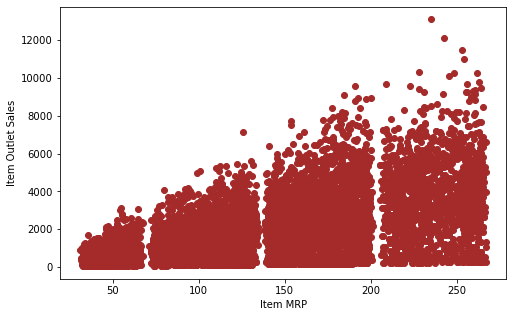

In [69]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train,color='brown')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

In [ ]:
Items MRP ranging from 200-250 dollars is having high Sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

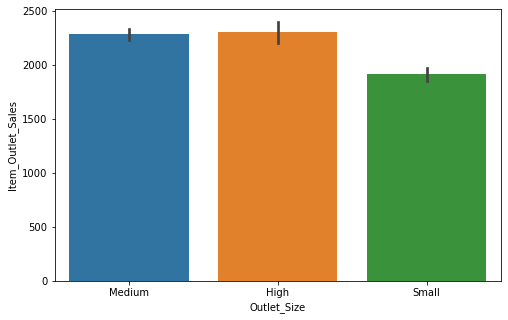

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

- The Outlet Sales is maximum for Medium and High sized Outlets.
- The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

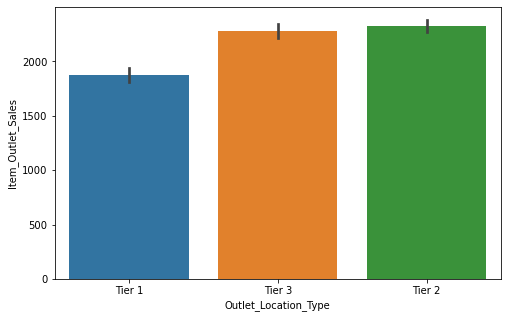

In [71]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)

The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

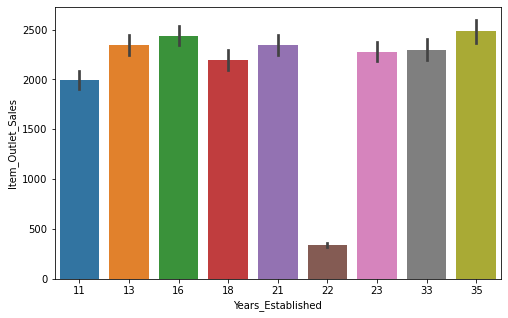

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train)

- It is quiet evident that Outlets established 35 years before is having good Sales margin.
- We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve   the Sales unless the products are sold according to customer's interest.

### Multivariate Analysis

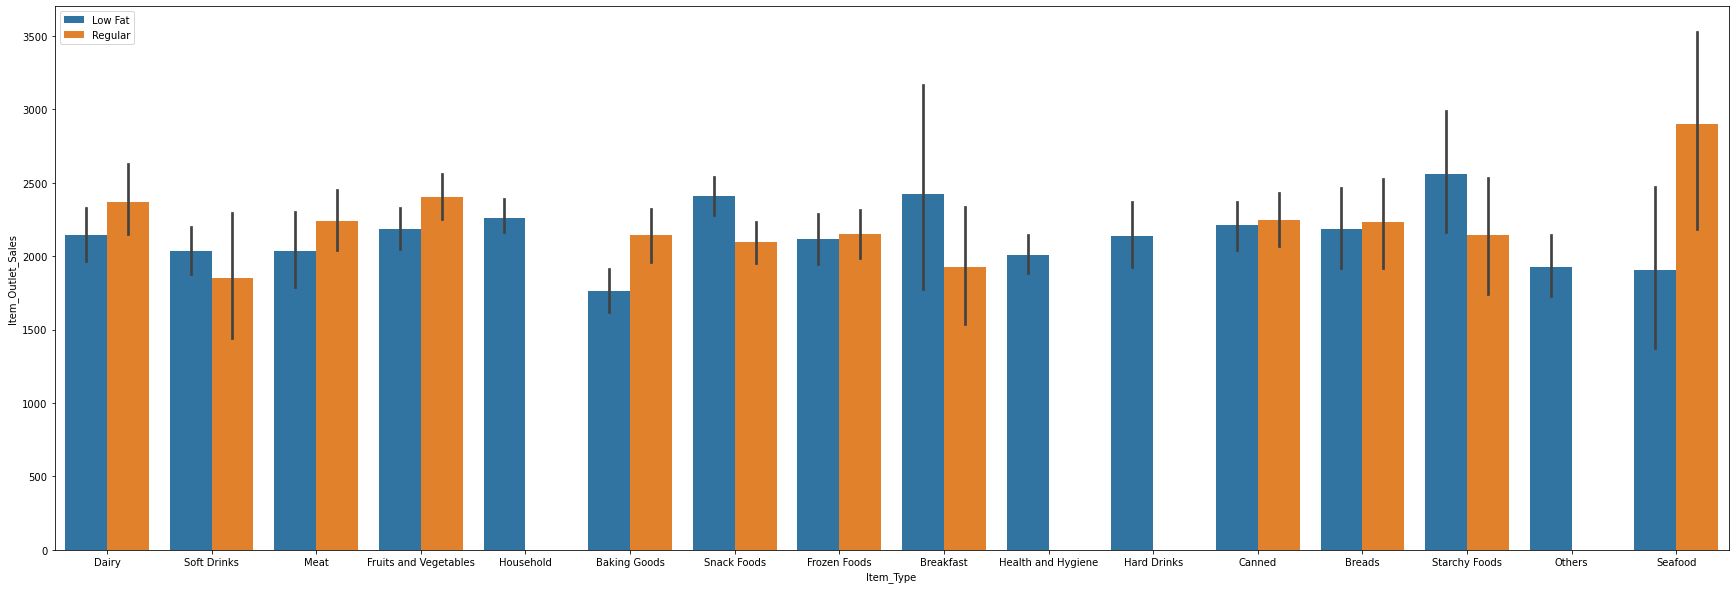

In [73]:
plt.figure(figsize=(30,10))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train)
plt.legend()

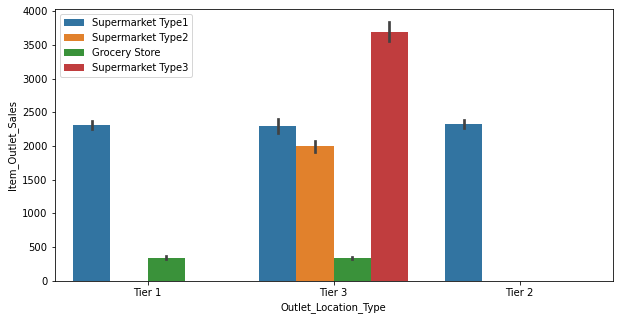

In [74]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train)
plt.legend()

The Tier-3 location type has all types of Outlet type and has high sales margin.

## Feature Engineering

In [75]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,33
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,18
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,16
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,11


In [76]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [77]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,21
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,11
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,21
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800,22
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,33


#### There are some columns that needs to be dropped as they don't seem helping our analysis.

In [78]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [79]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

In [80]:
X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
y= train['Item_Outlet_Sales']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [83]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type',
           'Outlet_Type','Years_Established']

### Building Model

#### 1) Linear regression

In [84]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
coef2 = pd.Series(lr.coef_,features).sort_values()

In [85]:
coef2

Item_Visibility        -1709.417280
Outlet_Location_Type    -434.605812
Outlet_Size             -339.441273
Years_Established         -1.425485
Item_Weight                0.002459
Item_Type                  1.696998
Item_MRP                  15.616646
Item_Fat_Content          35.759818
Outlet_Type             1007.739359
dtype: float64

<AxesSubplot:>

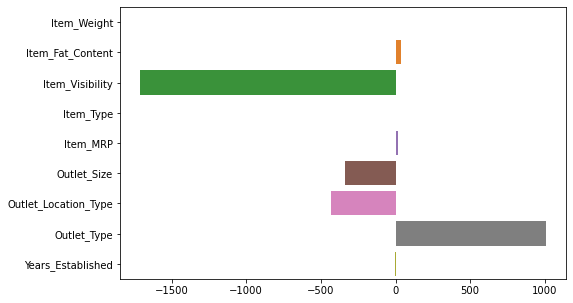

In [86]:
plt.figure(figsize=(8,5))
sns.barplot(lr.coef_,features)

### Evaluation Metrics

#### a) R-Squared:

R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

- If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [87]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.4946245671867817

#### b) MAE and MSE:

- MAE : The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.
- MSE : The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [88]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [89]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 933.3418289826433
mean squared error: 1561773.775403381


#### c) RMSE:
RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [90]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1249.7094763997675


### 2) Random Forest Regressor

In [91]:
rf= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
rf.fit(X_train,y_train)

# Making Predictions
y_pred = rf.predict(X_test)

In [92]:
coef3 = pd.Series(rf.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                0.543879
Outlet_Type             0.397488
Years_Established       0.057754
Item_Weight             0.000267
Outlet_Location_Type    0.000265
Item_Visibility         0.000248
Item_Type               0.000078
Outlet_Size             0.000021
Item_Fat_Content        0.000000
dtype: float64

<AxesSubplot:>

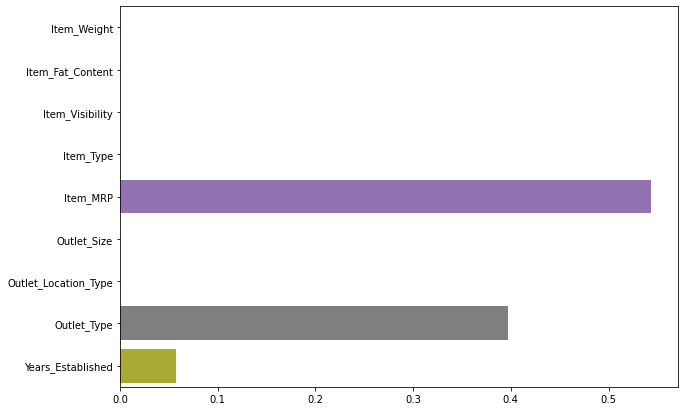

In [94]:
plt.figure(figsize=(10,7))
sns.barplot(rf.feature_importances_,features)

### Cross Validation

In [95]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [96]:
cross_val(lr,LinearRegression(),X,y,5)

LinearRegression(normalize=True) Scores:
0.53
0.5
0.49
0.51
0.51
Average LinearRegression(normalize=True) score: 0.51


In [97]:
cross_val(rf,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.57
0.52
0.51
0.55
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55


We can see that differance of the Linear Regression model and the Random Forest Regressor model, Random Forest Regressor clearly did best model.

### Conclusions

We can see that in the barplot:
- Item_MRP clearly maximises the Outlet sales.
- Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.
- Years Established will also tend to have loyal customers and that's how the sales margin can be acheived.